# Table of Contents
---

* [Data Dictionary](#Data-Dictionary)                                                                                     
  
* [Importing Libraries](#Importing-Important-Libraries)                                                                   
    
* [Importing Dataset](#Importing-Datasets)                                                                                

* [Data Preprocessing](#Data-Preprocessing)                                                                               

* [Data Visualization](#Data-Visualization) 

* [Feature Engineering](#Feature-Engineering)

* [Declaring the X&Y Variables ](#Declaring-the-X&Y-Variables)

* [Balancing the Target Column](#Balancing-the-Target-Column)

* [Spliting the Data ](#Spliting-the-Data)

* [ Data Scaling](#Data-Scaling)

* [ Baseline Model ](#Baseline-Model )

* [Plotting Final ML Models](#Plotting-Final-Models)

* [Final Observation](#Final-Observation)

# Data Dictionary             


----

* Describing each column in the dataset what does it means.




1) employee_id = Unique ID of the Employee.                                                                                
2) department =  Name of the Department in which the Employee Works.   
3) region = number of region in which the employee resides.                                                               
4) education = Education level of the employee.                                                                            
5) gender = Gender of the Employee.                                                                                        
6) recruitment_channel = Channel of Recruitment for employee.                                                              
7) no_ of_ trainings = Number of Trainings completed by Employee.                                                          
8) age = Age of Employee.                                                                                                  
9) previous_ year_ rating = Ratings of Employee given for last year.                                                        
10) length_ of_ service = Number of years a employee is working in the Industry.                                           
11) KPIs_meet > 80% = Key Performance meets more than 80% of a employee or not.                                           
12) awards_ won? = If an employee has won any award or not.                                                                
13) avg_ training_ score = Average score of current training sessions.                                                      
14) is_promoted = If Recomended for Promotion or not.

# Importing Important Libraries                  
----
* Installing and Importing required Libraries

In [1]:
!pip install xgboost  
!pip install catboost 
!pip install lightgbm 

In [2]:
import pandas as pd   ##Importing Pandas library 
import numpy as np    ## IMporting Numpy Library
import matplotlib.pyplot as plt  ## Importing Matplotlib for Data Viz.
%matplotlib inline
import seaborn as sns  ## Importing Seaborn for Data Viz.
import warnings 
warnings.filterwarnings('ignore') ## To ignore fliter warnings 
sns.set(rc={"figure.figsize":(14, 10)})  ## Setting the Universal plot size in Data Viz.

# Importing Datasets
----
* Importing Dataset using pandas function

In [3]:
df = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_data.csv')

In [4]:
df .sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
6100,45980,R&D,region_4,Master's & above,m,other,2,36,1.0,10,0,0,85,0
47152,36111,Operations,region_32,Bachelor's,m,sourcing,1,39,1.0,5,0,0,60,0
4309,10347,Procurement,region_26,Bachelor's,f,other,1,25,NaN,1,0,0,69,0
46812,65573,Technology,region_27,Bachelor's,f,sourcing,1,28,3.0,2,1,0,80,1
18269,64239,Analytics,region_9,Master's & above,m,other,1,30,4.0,3,1,0,87,0


In [5]:
test.sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
10635,47220,R&D,region_15,Master's & above,m,other,1,34,3.0,7,0,0,84
23112,70304,Technology,region_7,Bachelor's,f,other,2,30,5.0,4,1,0,78
1102,44110,Technology,region_7,Master's & above,f,other,1,46,5.0,5,1,0,75
13231,58703,Technology,region_2,Bachelor's,f,other,1,58,4.0,12,0,0,82
18367,18690,Operations,region_11,Bachelor's,m,sourcing,1,47,3.0,16,0,0,64


In [6]:
print(df.columns)
print(test.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')
Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')


In [7]:
print("TheRows and Columns in df set is ",df.shape)
print("The Rows and Columns in Test set is",test.shape)

TheRows and Columns in df set is  (54808, 14)
The Rows and Columns in Test set is (23490, 13)


# Data Preprocessing
---
* Performing actions like {isnull(),duplicated(),skew()} on datasets to check if data is useable ready or not 
* Processing Data to make it more ready.

#### 1. Cheecking for the Null values 

##### 1. For the Train set

In [8]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
df.skew()

employee_id            -0.003128
no_of_trainings         3.445434
age                     1.007432
previous_year_rating   -0.310638
length_of_service       1.738061
KPIs_met >80%           0.619909
awards_won?             6.338914
avg_training_score      0.451908
is_promoted             2.972339
dtype: float64

In [10]:
### Lets Fill the null values 



df['education'] = df['education'].fillna(df['education'].mode()[0])

df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())

df['is_promoted'] = df['is_promoted'].fillna(0) 

##### 2. For the test set

In [11]:
## Checking for the null values 

test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [12]:
test['education'] = test['education'].fillna(test['education'].mode()[0])

test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].median())

In [13]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

Now there are no Null Values in the Dataset 

#### 3. Duplicate Values 

In [14]:
df.duplicated().sum()

0

In [15]:
test.duplicated().sum()

0

There are no Duplicate Values in the dataset

#### 4. Removing Unwanted Columns

##### 1. for the train set

In [16]:
df.drop(columns = ['employee_id',"region"],inplace= True,axis = 1)
df.sample(5)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
17206,Technology,Bachelor's,m,sourcing,1,32,2.0,3,0,0,79,0
39344,Sales & Marketing,Bachelor's,m,other,1,28,3.0,1,0,1,54,0
29968,Sales & Marketing,Bachelor's,m,other,3,28,2.0,4,0,0,49,0
10689,Operations,Bachelor's,f,sourcing,1,45,4.0,4,1,0,57,0
52039,Sales & Marketing,Bachelor's,f,sourcing,1,30,5.0,5,1,0,49,0


##### 2. for the test set

In [17]:
test.drop(columns = ['employee_id',"region"],inplace= True,axis = 1)
test.sample(5)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
22531,Sales & Marketing,Master's & above,m,sourcing,1,59,1.0,18,0,0,55
22722,Operations,Bachelor's,m,other,1,30,2.0,7,0,0,57
8976,Procurement,Master's & above,m,other,1,29,3.0,1,1,0,74
21754,Analytics,Bachelor's,m,other,1,32,3.0,5,0,0,86
14934,Sales & Marketing,Bachelor's,m,sourcing,1,34,1.0,3,0,0,48


#### 5. Checking the Column Types and correcting them

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   education             54808 non-null  object 
 2   gender                54808 non-null  object 
 3   recruitment_channel   54808 non-null  object 
 4   no_of_trainings       54808 non-null  int64  
 5   age                   54808 non-null  int64  
 6   previous_year_rating  54808 non-null  float64
 7   length_of_service     54808 non-null  int64  
 8   KPIs_met >80%         54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 5.0+ MB


In [19]:
### Since there are two columns with whole numbers but represented as float we will change it to Int Columns.

df['previous_year_rating'] = df['previous_year_rating'].astype('int64')

df['is_promoted'] = df['is_promoted'].astype('int64')

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   education             23490 non-null  object 
 2   gender                23490 non-null  object 
 3   recruitment_channel   23490 non-null  object 
 4   no_of_trainings       23490 non-null  int64  
 5   age                   23490 non-null  int64  
 6   previous_year_rating  23490 non-null  float64
 7   length_of_service     23490 non-null  int64  
 8   KPIs_met >80%         23490 non-null  int64  
 9   awards_won?           23490 non-null  int64  
 10  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 2.0+ MB


In [21]:
### Since there are two columns with whole numbers but represented as float we will change it to Int Columns.

test['previous_year_rating'] = test['previous_year_rating'].astype('int64')

#### 6. Checking for Outliers

<AxesSubplot:>

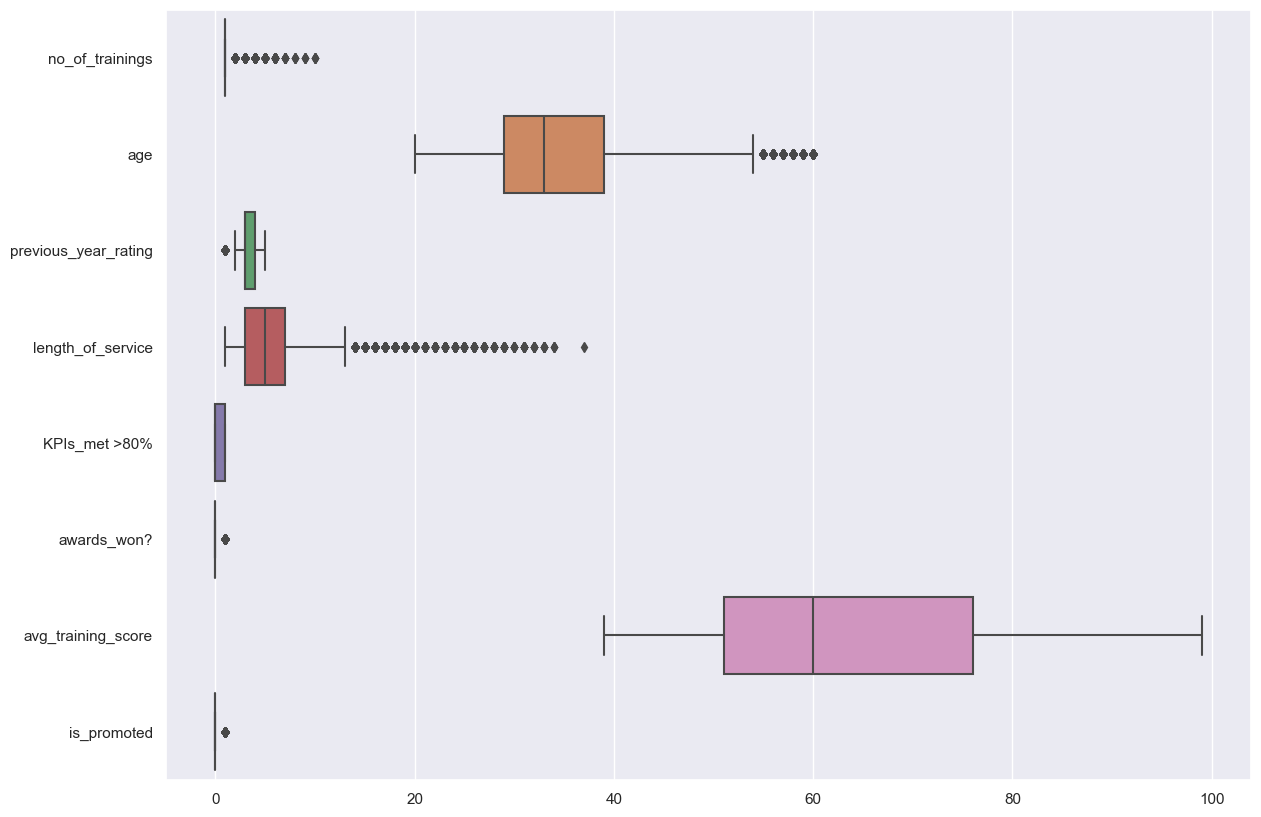

In [22]:
sns.boxplot(data = df,orient = 'h')

<AxesSubplot:>

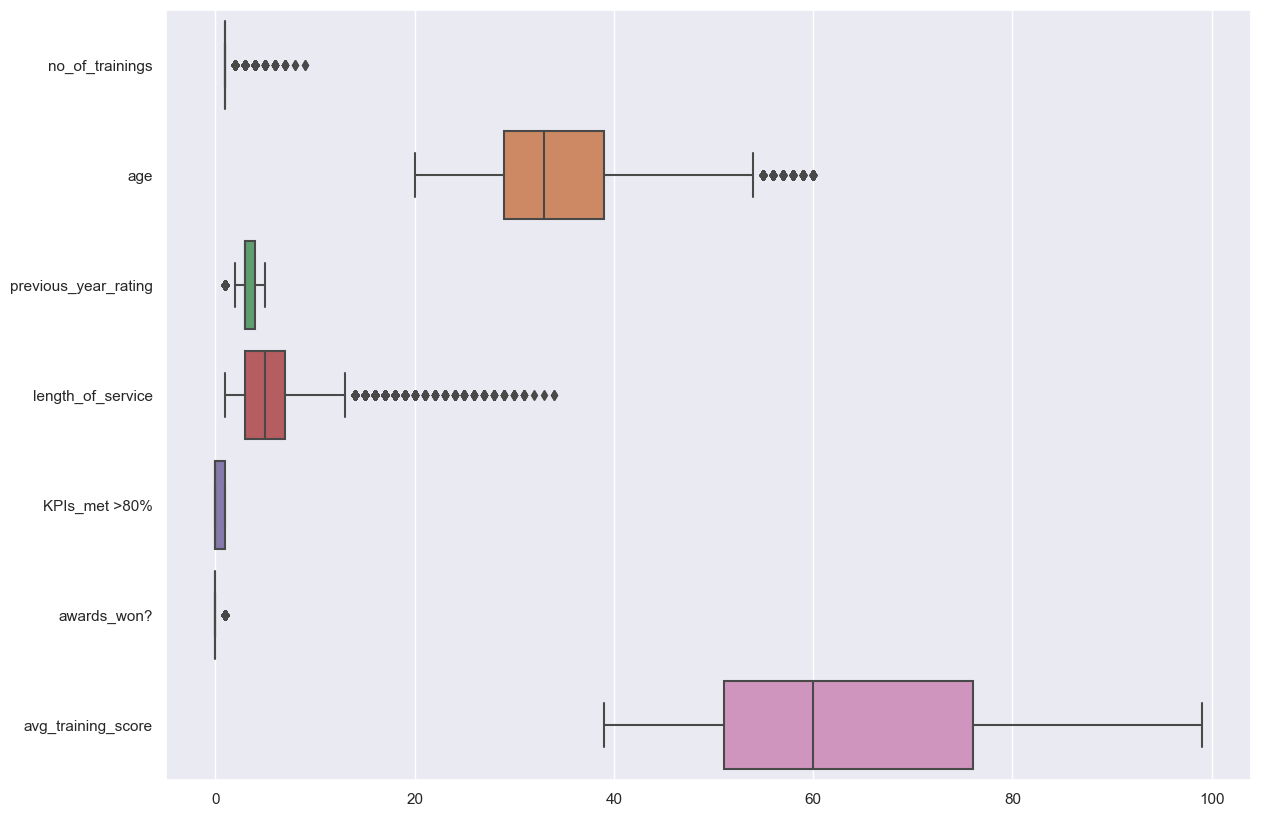

In [23]:
sns.boxplot(data = test,orient = 'h')

* As we can see that no outliers are greater than 0.5% of the data, this will not affect the data and accuracy much

# Data Visualization
---------
* Using Seaborn and Matplotlib Library to plot countplots of the data to gain insights on the data. [⬆️](#Table-of-Contents)

#### 1. Lets check the no of Employees Promoted 

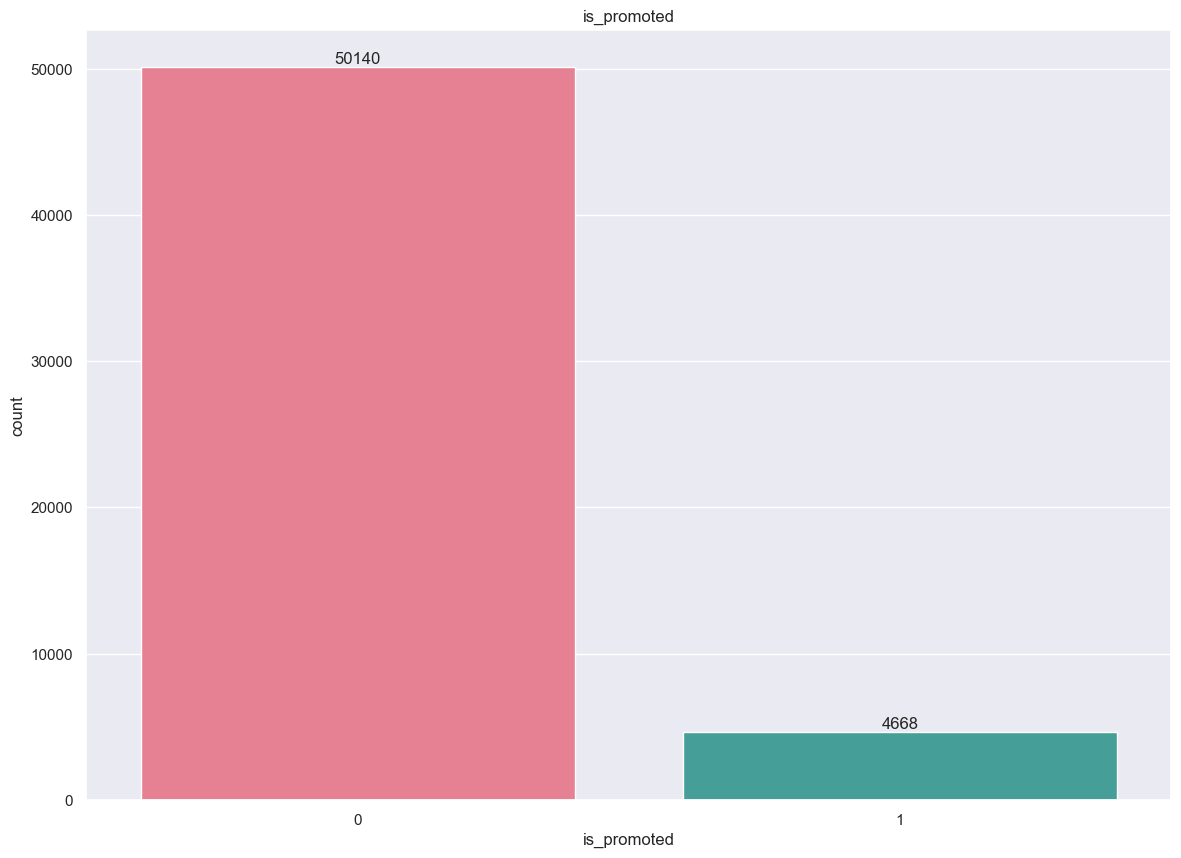

In [24]:
ax = sns.countplot(data = df , x = 'is_promoted',palette="husl")
plt.title('is_promoted')
x = ax.bar_label(ax.containers[0])

* Since we can see that there is too much difference between promoted and not promoted there are chances of data being Imbalance.

#### 2. Checking the Promotion Gender Wise

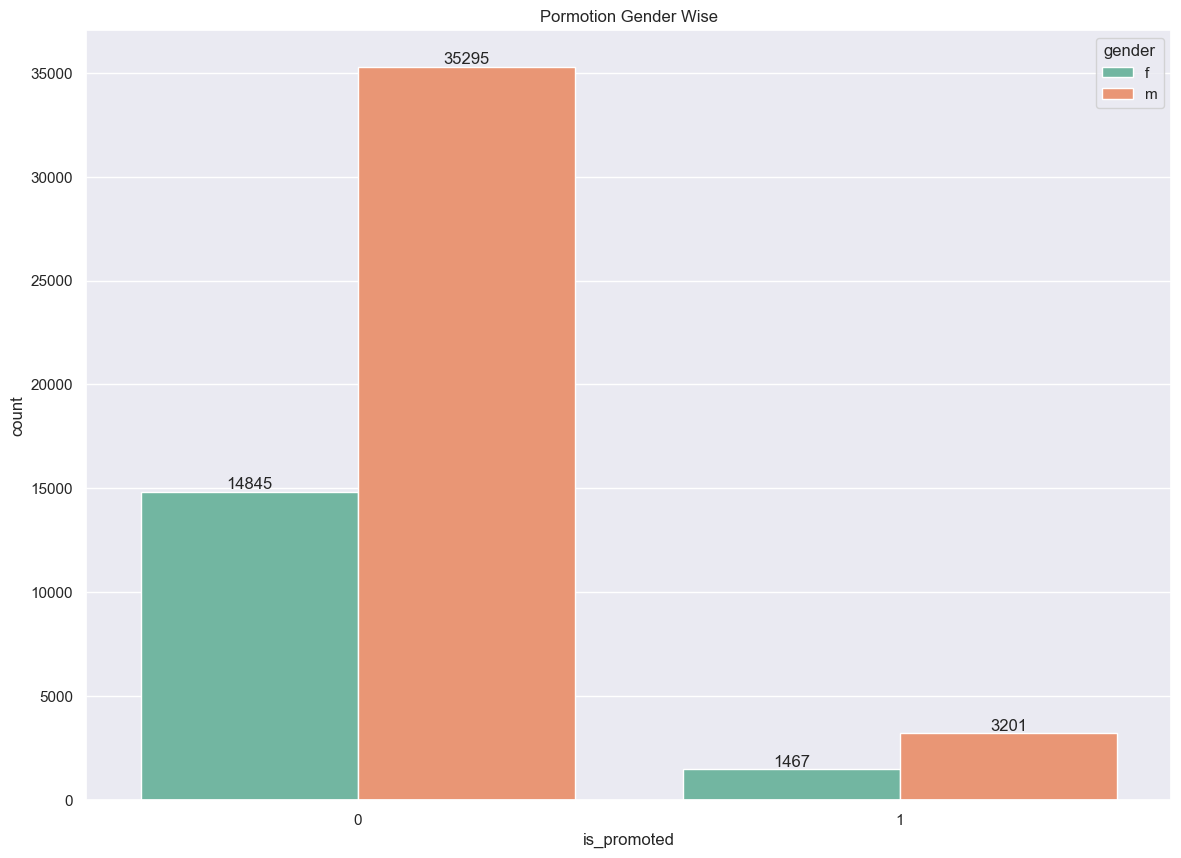

In [25]:
ax = sns.countplot(data = df , x = 'is_promoted', hue= 'gender',palette= "Set2")
plt.title('Pormotion Gender Wise')
x = ax.bar_label(ax.containers[0])
x = ax.bar_label(ax.containers[1])

* Males have a greater probability of getting the Promotion

#### 3. Promotion vs Awards Won

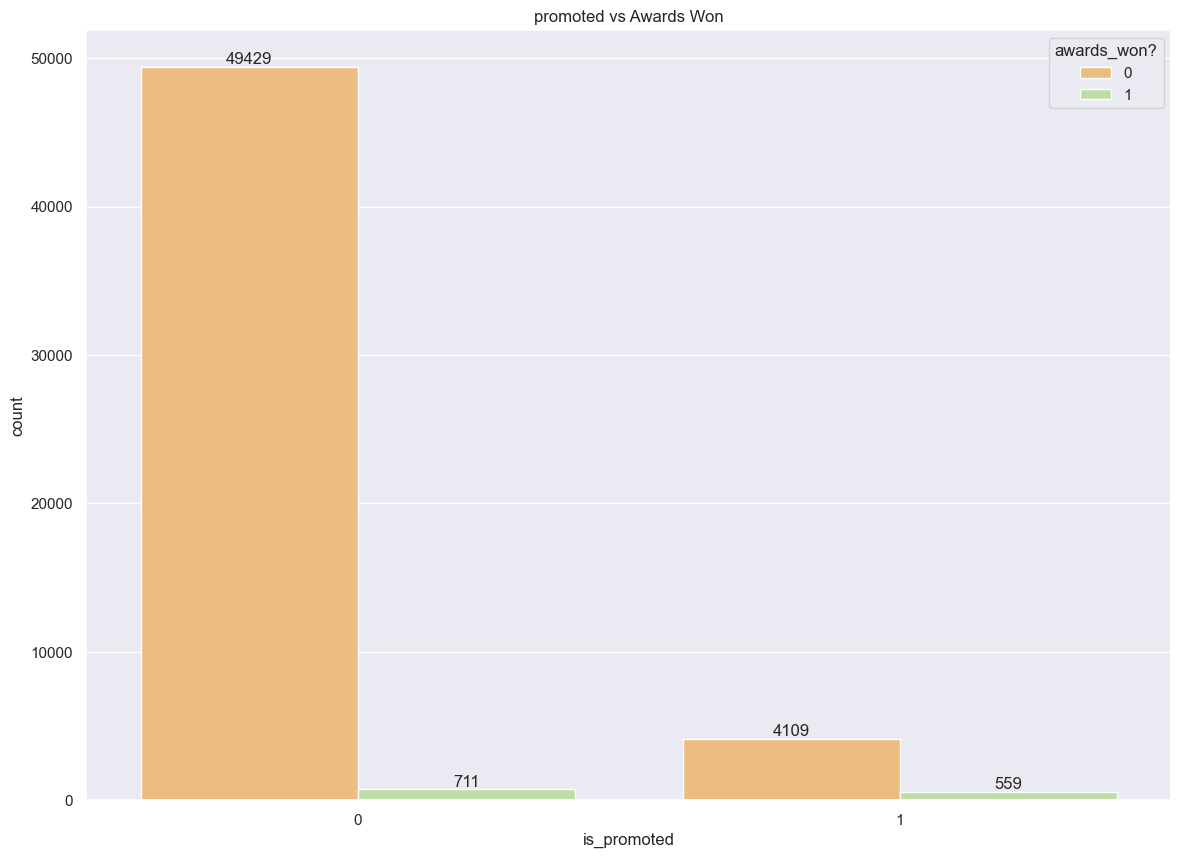

In [26]:
ax = sns.countplot(data = df , x = 'is_promoted', hue= 'awards_won?',palette="Spectral")
plt.title('promoted vs Awards Won')
x = ax.bar_label(ax.containers[0])
x = ax.bar_label(ax.containers[1])

* Employees who have won awards are less likely to be promoted than those who have not

#### 4. Checking the KPIs above 80% of the employees education wise.

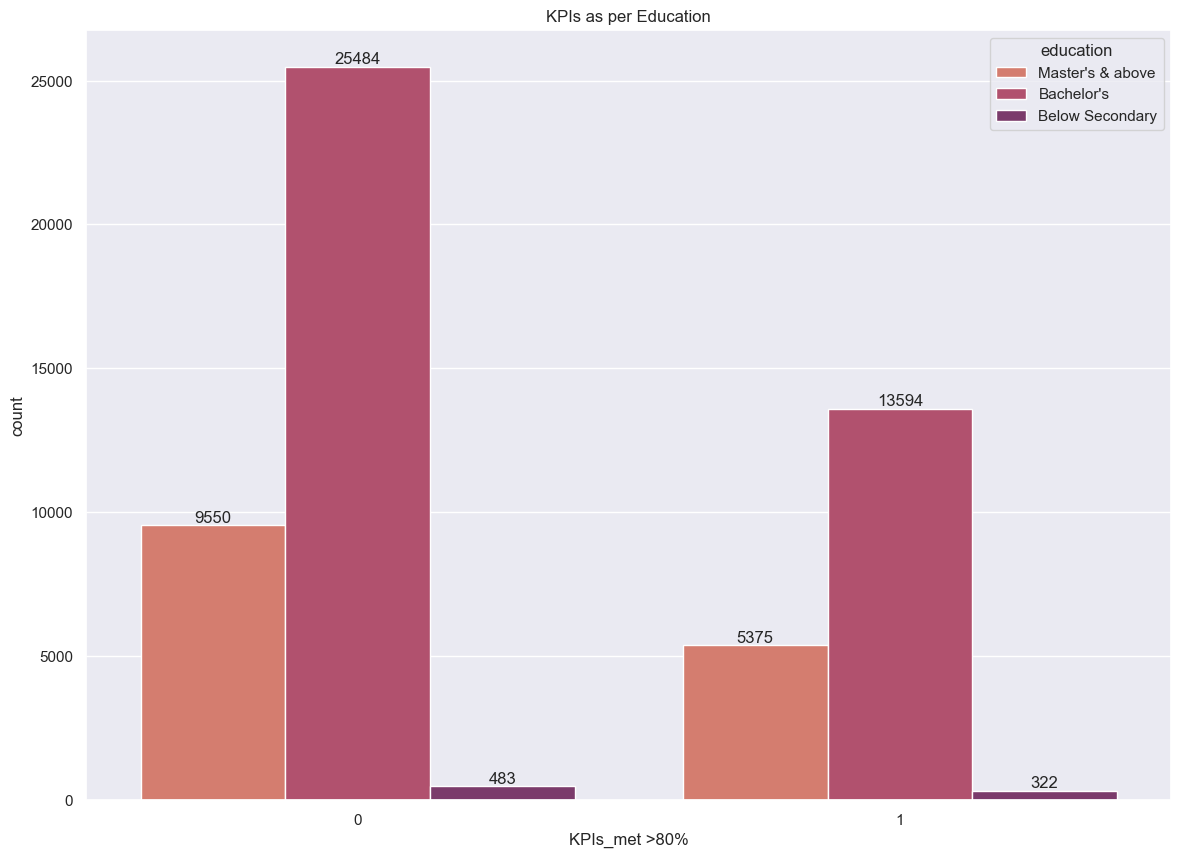

In [27]:
ax = sns.countplot(data = df , x = "KPIs_met >80%", hue= 'education',palette="flare")
plt.title('KPIs as per Education')
x = ax.bar_label(ax.containers[0])
x = ax.bar_label(ax.containers[1])
x = ax.bar_label(ax.containers[2])
plt.show()

* The Bachleor's degree holding Employees are more who have KPIs met above 80% than other Degree Holders

#### 5. Range of Age Of Employees

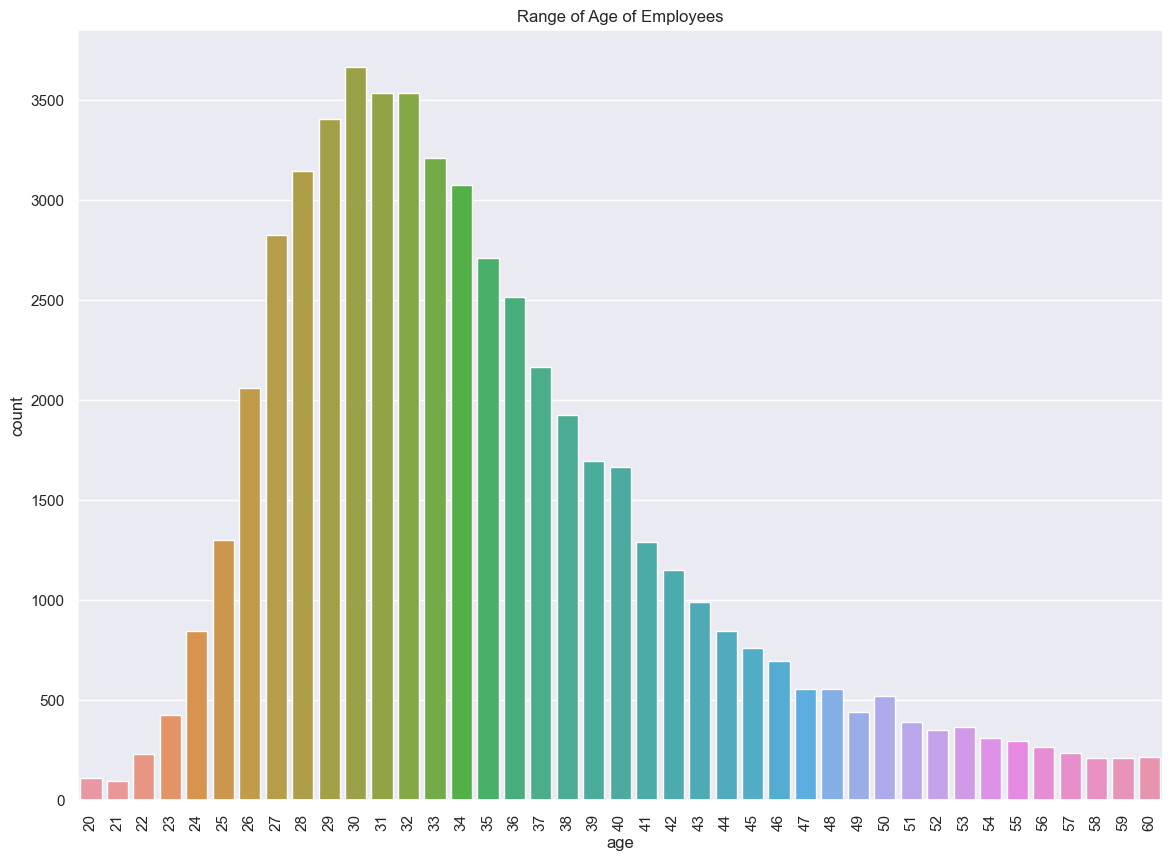

In [28]:
ax = sns.countplot(data = df , x = "age")
plt.xticks(rotation = 90)
plt.title('Range of Age of Employees')
plt.show()

* We Can see that the Maximum Employees are of Age between 25 to 45 

#### 6. Impact of Length of service on Promotion

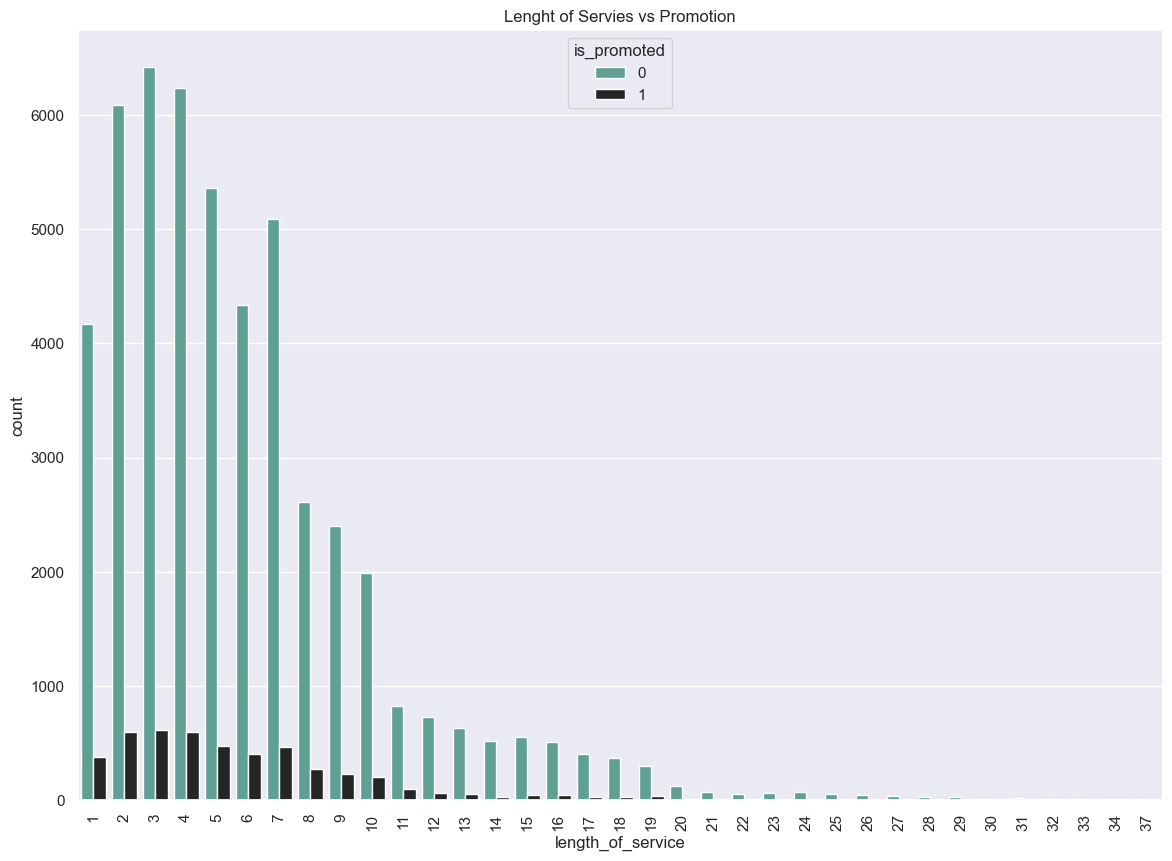

In [29]:
ax = sns.countplot(data = df , x = "length_of_service",hue = 'is_promoted',palette="dark:#5A9_r")
plt.xticks(rotation = 90)
plt.title('Lenght of Servies vs Promotion')
plt.show()

* As we can see that as the number of years of service increases the probability of getting promotion decreases

#### 7. Checking the KPIs above 80% gender wise

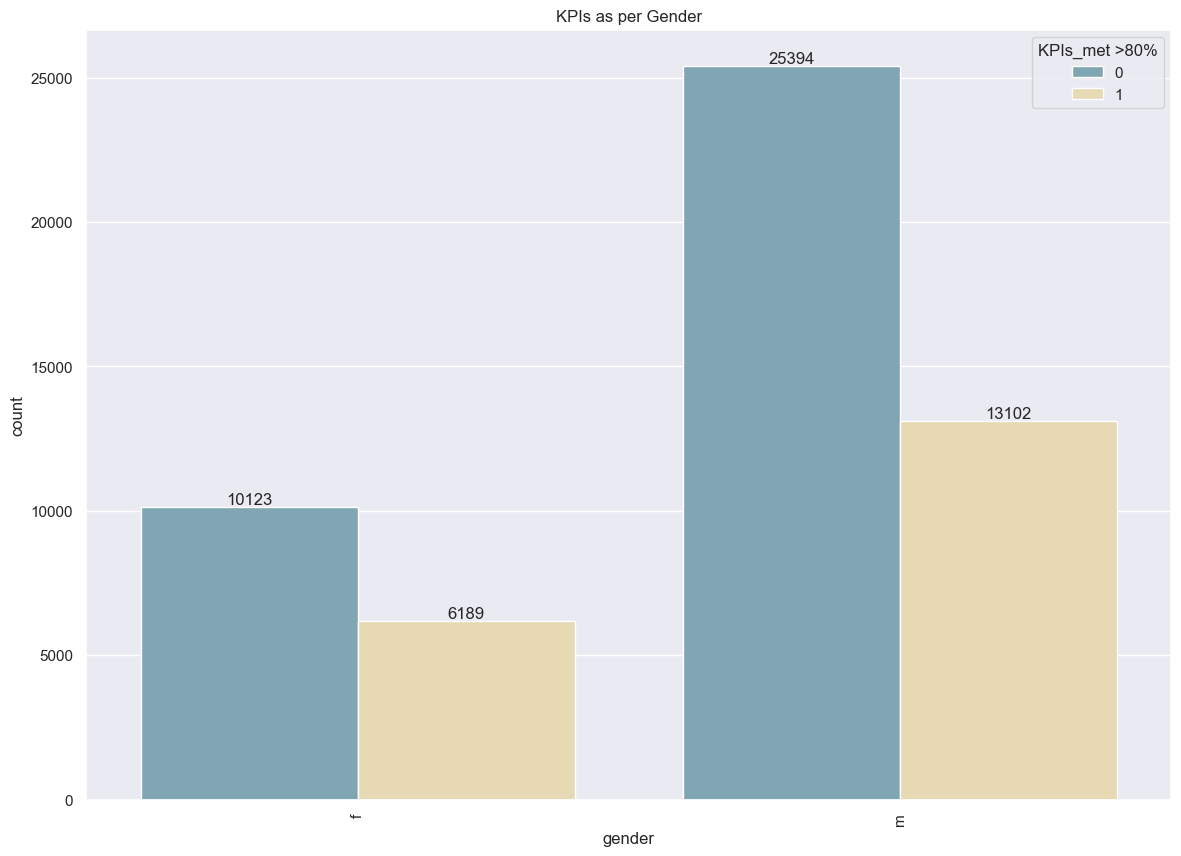

In [30]:
ax = sns.countplot(data = df , x = "gender",hue = 'KPIs_met >80%',palette="blend:#7AB,#EDA")
plt.xticks(rotation = 90)
plt.title('KPIs as per Gender')
x = ax.bar_label(ax.containers[0])
x = ax.bar_label(ax.containers[1])
plt.show()

* Males have a higher probability of having KPI above 80% than Females

#### 8. Checking the Recruitment  channel as per promotion 

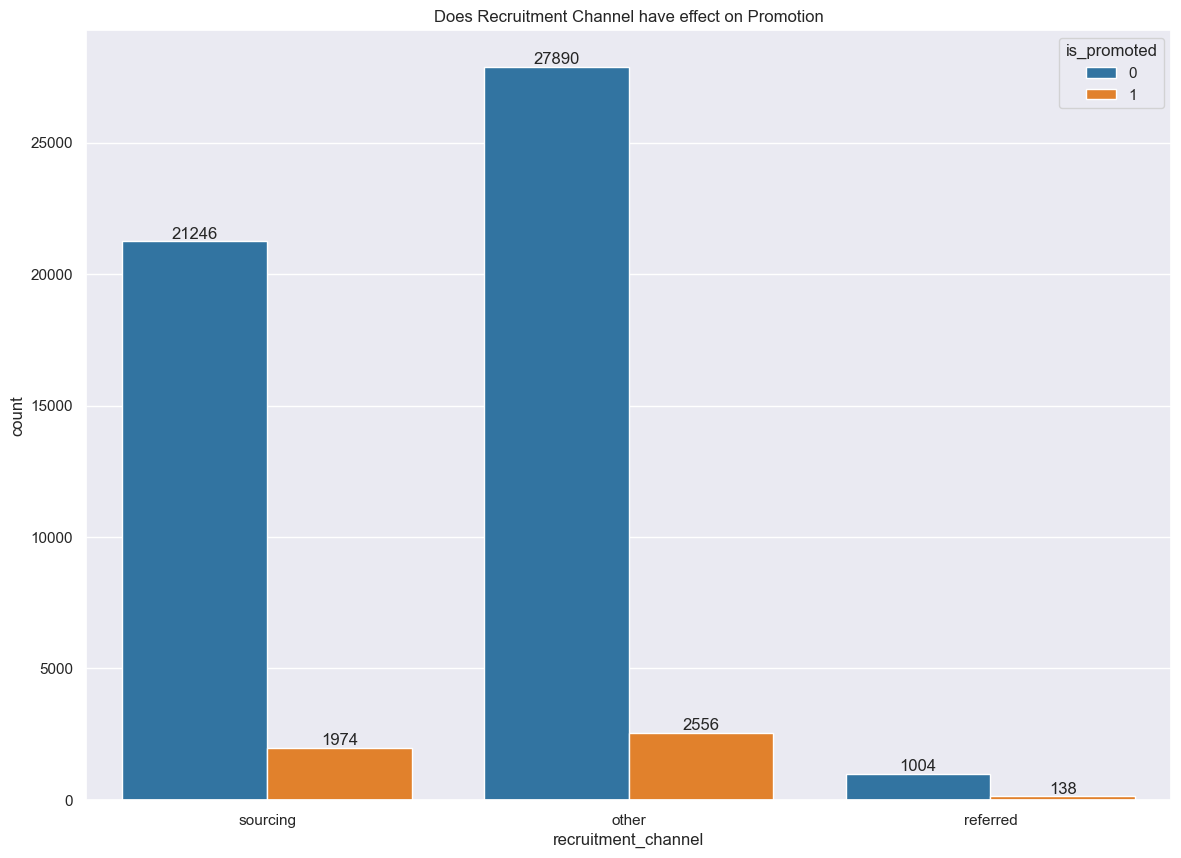

In [31]:
ax = sns.countplot(data = df , x = 'recruitment_channel', hue= 'is_promoted',palette='tab10')
plt.title('Does Recruitment Channel have effect on Promotion')
x = ax.bar_label(ax.containers[0])
x = ax.bar_label(ax.containers[1])

* Since Major promotion have others as recuritment channel , we can fairly conclude that there is no impact of recruitment channel on Promotion.

#### 9. Checking the Promotion Department wise

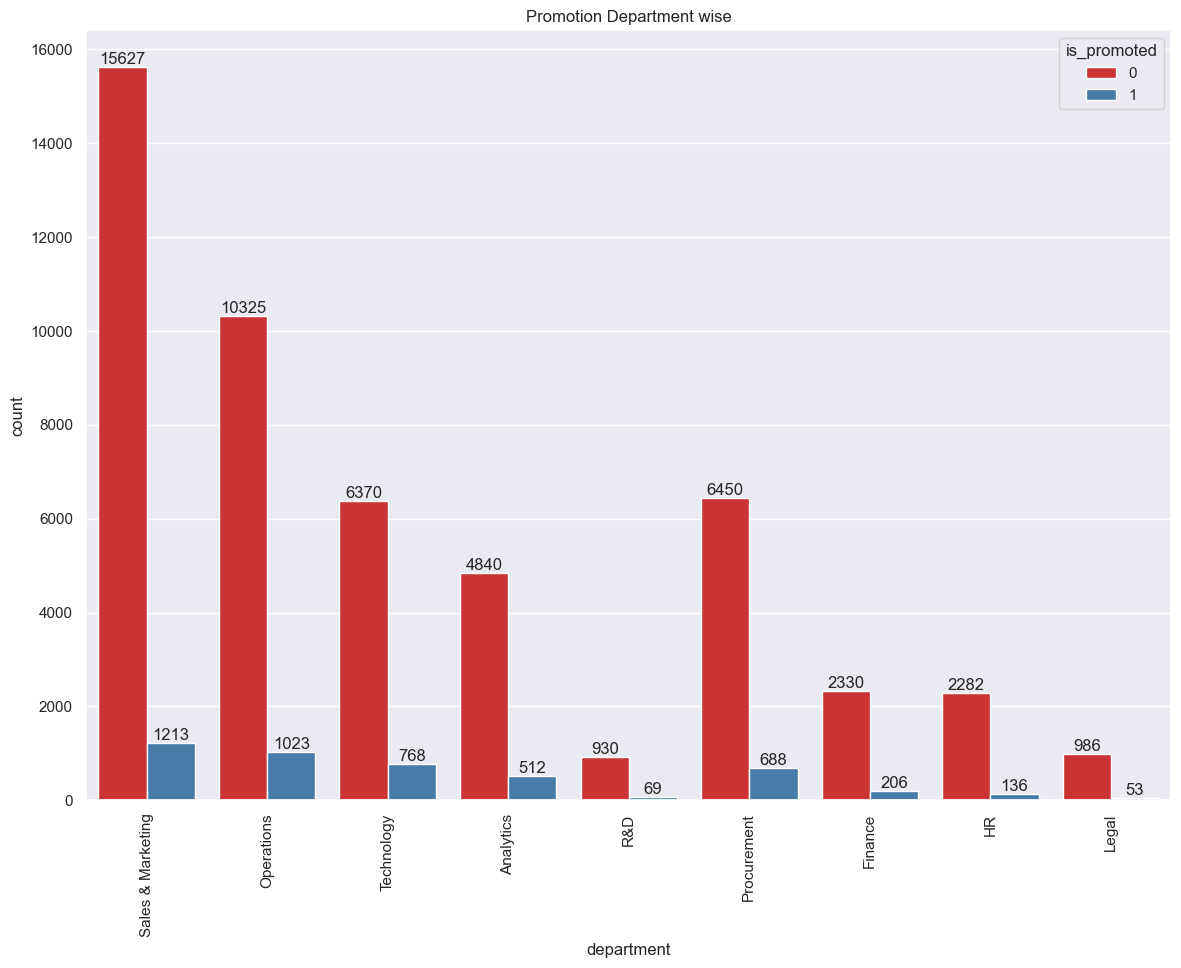

In [32]:
ax = sns.countplot(data = df , x = 'department', hue= 'is_promoted',palette='Set1')
plt.title('Promotion Department wise')
plt.xticks(rotation=90)
x = ax.bar_label(ax.containers[0])
x = ax.bar_label(ax.containers[1])

* Candidates in Sales and Marketing Department have higher promotions as compared to other departments

#### 10. Average Traning Score vs Gender 

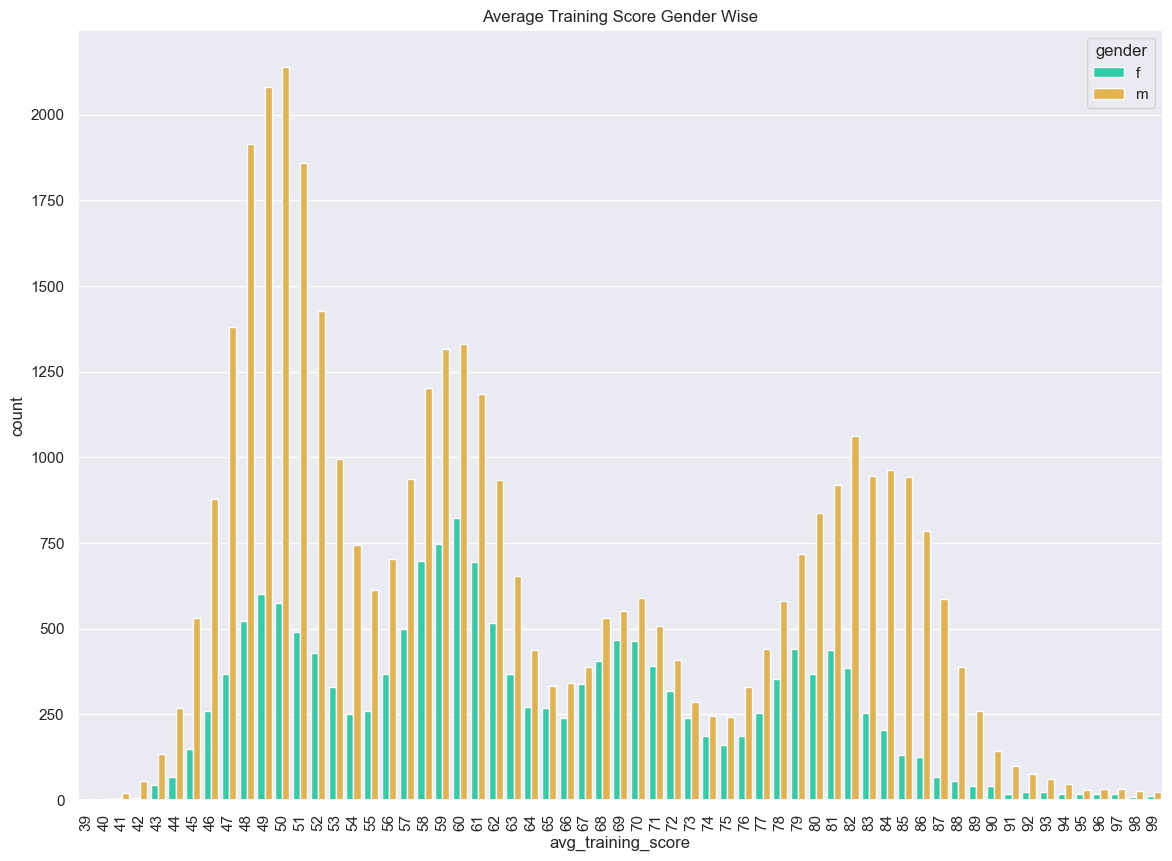

In [33]:
sns.countplot(data = df , x = 'avg_training_score', hue= 'gender',palette="turbo")
plt.title('Average Training Score Gender Wise')
plt.xticks(rotation=90)
plt.show()

* Males have Compratively higher average training score than Females

#### 11. Promtion Previous Year Rating Wise.

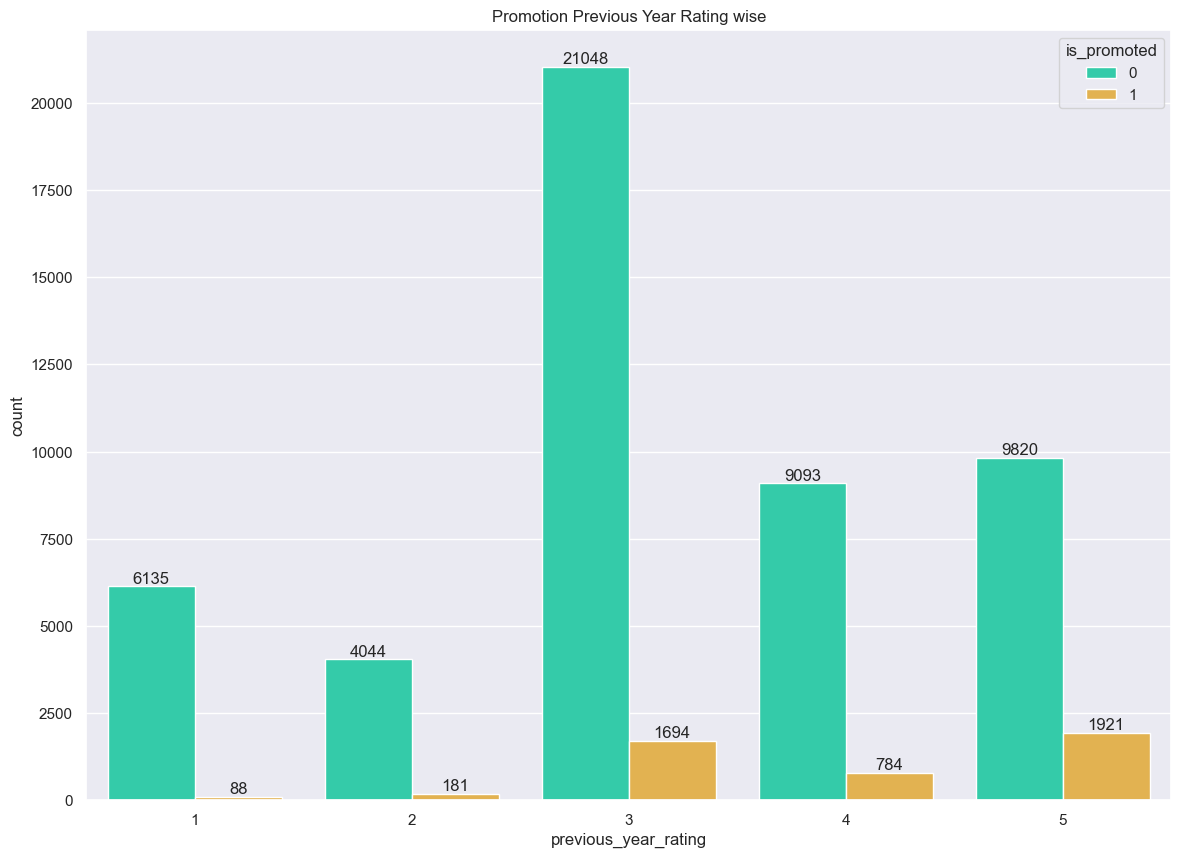

In [34]:
ax = sns.countplot(data = df , x = 'previous_year_rating', hue= 'is_promoted',palette="turbo")
plt.title('Promotion Previous Year Rating wise')
x = ax.bar_label(ax.containers[0])
x = ax.bar_label(ax.containers[1])

* The Candidates having previous year ratings above 3 have the highest chances of gettting the promotions

#### 12. KPIs met above 80% vs awards won

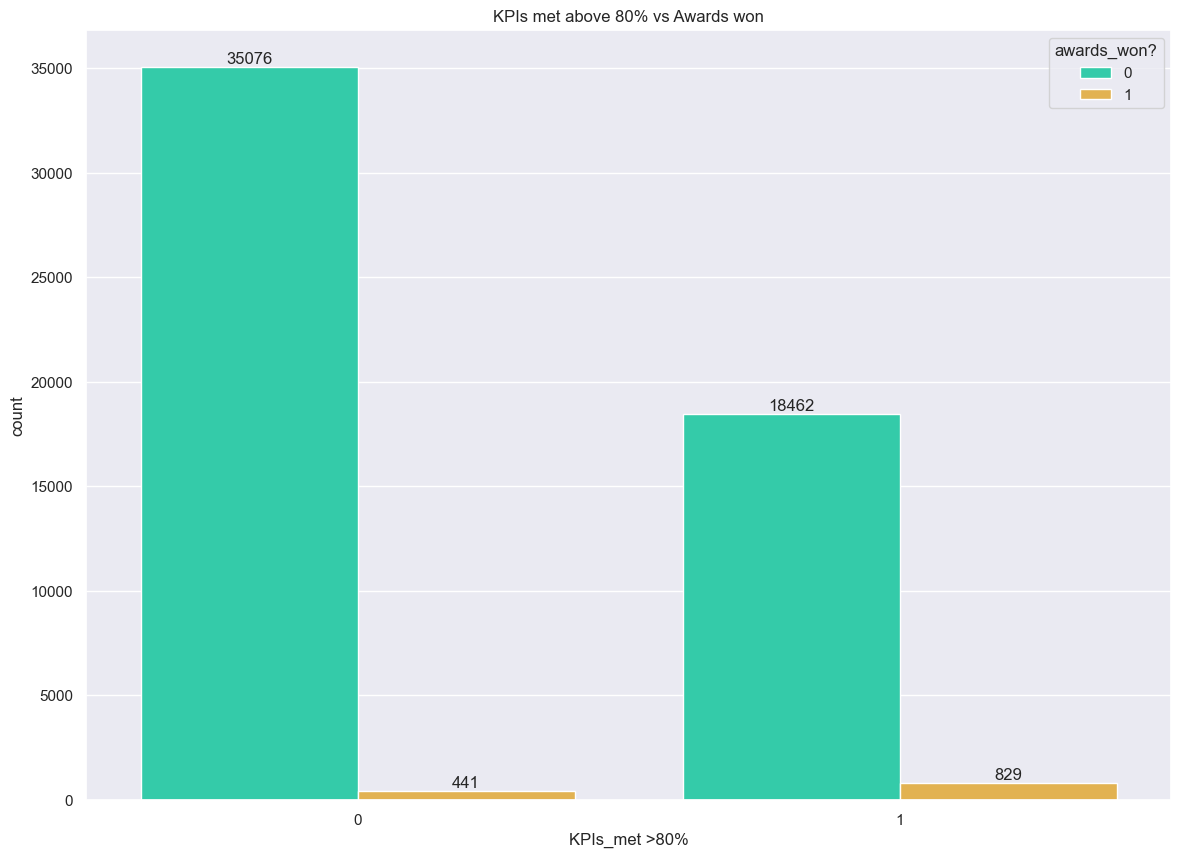

In [35]:
ax = sns.countplot(data = df , x = 'KPIs_met >80%', hue= 'awards_won?',palette="turbo")
plt.title('KPIs met above 80% vs Awards won')
x = ax.bar_label(ax.containers[0])
x = ax.bar_label(ax.containers[1])

* The Candidates having KPI more than 80% have won more awards than the candiadates not having KPIs met above 80%.

# Feature Engineering
---
* Feature Engineering refers to manipulation — addition, deletion, combination, mutation — of your data set to improve machine learning model training, leading to better performance and greater accuracy.
* Using the Map Fucntion to convert Categorical Columns into Numerical Columns.

#### 1. Gender Column

In [36]:
### For the train

df['gender'] = df['gender'].map({'f':0,
                                'm':1})
df['gender'].sample(5)

5562     1
21245    0
46485    0
40466    0
17909    0
Name: gender, dtype: int64

In [37]:
### For the test set

test['gender'] = test['gender'].map({'f':0,
                                'm':1})
test['gender'].sample(5)

5461     1
9037     1
16735    1
5054     1
6164     1
Name: gender, dtype: int64

#### 2. Recuirtment Channel

In [38]:
### For the train set

df['recruitment_channel'] = df['recruitment_channel'].map({"other":0,
                                                          'sourcing':1,
                                                          'referred':2})
df['recruitment_channel'].value_counts()

0    30446
1    23220
2     1142
Name: recruitment_channel, dtype: int64

In [39]:
### For the test Set


test['recruitment_channel'] = test['recruitment_channel'].map({"other":0,
                                                          'sourcing':1,
                                                          'referred':2})
test['recruitment_channel'].value_counts()

0    13078
1     9961
2      451
Name: recruitment_channel, dtype: int64

Lets check the correlation between promotion and recruitment channel since we have a doubt that this feautre is of no use to machine learrning Algorithm

In [40]:
df.corr()['recruitment_channel']

gender                  0.008850
recruitment_channel     1.000000
no_of_trainings        -0.014879
age                    -0.027118
previous_year_rating    0.031394
length_of_service      -0.014669
KPIs_met >80%           0.018660
awards_won?            -0.003819
avg_training_score      0.009925
is_promoted             0.009438
Name: recruitment_channel, dtype: float64

In [41]:
test.corr()['recruitment_channel']

gender                  0.003167
recruitment_channel     1.000000
no_of_trainings        -0.011342
age                    -0.029005
previous_year_rating    0.030564
length_of_service      -0.018795
KPIs_met >80%           0.021039
awards_won?            -0.001817
avg_training_score     -0.009507
Name: recruitment_channel, dtype: float64

In [42]:
## Since we can see that this column has very weak corrleation with other columns , we will drop it here itself.

df.drop(columns= ['recruitment_channel'],inplace = True)

## For the Test Set

test.drop(columns= ['recruitment_channel'],inplace = True)

#### 3. Education Column

In [43]:
#### For the train set

df['education'] = df['education'].map({"Bachelor's":0,
                                       "Master's & above":1,
                                       'Below Secondary':2})
df['education'].value_counts()

0    39078
1    14925
2      805
Name: education, dtype: int64

In [44]:
### For the Test set

test['education'] = test['education'].map({"Bachelor's":0,
                                       "Master's & above":1,
                                       'Below Secondary':2})
test['education'].value_counts()

0    16612
1     6504
2      374
Name: education, dtype: int64

#### 3.Department Column

In [45]:
df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [46]:
### For the Train Set

df['department'] = df['department'].map({"Sales & Marketing":0,
                                       "Operations":1,
                                        "Procurement":2,
                                        "Technology":3,
                                        "Analytics":4,
                                        "Finance":5,
                                        "HR":6,
                                        "Legal":7,
                                        "R&D":8})
df['department'].value_counts()

0    16840
1    11348
3     7138
2     7138
4     5352
5     2536
6     2418
7     1039
8      999
Name: department, dtype: int64

In [47]:
### For the test Set

test['department'] = test['department'].map({"Sales & Marketing":0,
                                       "Operations":1,
                                        "Procurement":2,
                                        "Technology":3,
                                        "Analytics":4,
                                        "Finance":5,
                                        "HR":6,
                                        "Legal":7,
                                        "R&D":8})
test['department'].value_counts()

0    7315
1    4764
2    3020
3    3011
4    2319
5    1091
6    1085
7     445
8     440
Name: department, dtype: int64

# Declaring the X&Y Variables 
---
* Dividing the data into x and y variables

In [48]:
x = df.drop(columns = ['is_promoted'],axis= 1)
y = df['is_promoted']
x_test = test

In [49]:
x

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,1,0,1,35,5,8,1,0,49
1,1,0,1,1,30,5,4,0,0,60
2,0,0,1,1,34,3,7,0,0,50
3,0,0,1,2,39,1,10,0,0,50
4,3,0,1,1,45,3,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...
54803,3,0,1,1,48,3,17,0,0,78
54804,1,1,0,1,37,2,6,0,0,56
54805,4,0,1,1,27,5,3,1,0,79
54806,0,0,1,1,29,1,2,0,0,45


In [50]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [51]:
x_test

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,3,0,1,1,24,3,1,1,0,77
1,6,0,0,1,31,3,5,0,0,51
2,0,0,1,1,31,1,4,0,0,47
3,2,0,0,3,31,2,9,0,0,65
4,5,0,1,1,30,4,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...
23485,7,2,1,1,24,3,1,0,0,61
23486,3,0,1,1,31,3,7,0,0,74
23487,6,0,0,1,26,4,4,0,0,50
23488,2,0,1,3,27,3,1,0,0,70


# Balancing the Target Column
---
* Using the Smote function to balance the Target Column, as we know that the data is imbalanced 

In [52]:
y.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [53]:
### Balancing it using Smote .

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=1,random_state=23)

x_res,y_res = sm.fit_resample(x,y)

In [54]:
### Checking the value Counts

y_res.value_counts()

0    50140
1    50140
Name: is_promoted, dtype: int64

# Spliting the Data 

* Spliting the data into train and test but we already have x_test and hence we will rename test to valid

In [55]:
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid = train_test_split(x_res,y_res,test_size = 0.2,random_state = 1234)

## Printing the shape of each Variables

print("The shape of x_train is",x_train.shape)

print("The shape of x_valid is",x_valid.shape)

print("The shape of y_train is",y_train.shape)

print("The shape of y_valid is",y_valid.shape)

print("The shape of x_test is",x_test.shape)


The shape of x_train is (80224, 10)
The shape of x_valid is (20056, 10)
The shape of y_train is (80224,)
The shape of y_valid is (20056,)
The shape of x_test is (23490, 10)


# Data Scaling 
----
* Creating a User Defined Function to Scale the Data and return the Scaled Dataset.

In [56]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

def scale_dataset(dataset, scalers):
    scaled_datasets = []
    for scaler in scalers:
        if scaler == 'standard':
            scaled_dataset = StandardScaler().fit_transform(dataset)
        elif scaler == 'minmax':
            scaled_dataset = MinMaxScaler().fit_transform(dataset)
        elif scaler == 'robust':
            scaled_dataset = RobustScaler().fit_transform(dataset)
        elif scaler == 'maxabs':
            scaled_dataset = MaxAbsScaler().fit_transform(dataset)
        else:
            raise ValueError("Invalid scaler: {}".format(scaler))
        scaled_datasets.append(scaled_dataset)
    return scaled_datasets

#  Baseline Model 

---
* Applying each Scaler on the dataset and using the Random Forest Model to know which scaler gives the highest Accuracy.

### 1. Standard Sclaer 

In [57]:
# Standard Scaler

scalers = ['standard']

# applying the scaler on the datasets

x_train_ss = scale_dataset(x_train, scalers)
x_valid_ss = scale_dataset(x_valid, scalers)
x_test_ss = scale_dataset(x_test, scalers)

## Reshaping the Data Set 

x_train_ss = np.array(x_train_ss)
x_train_ss = x_train_ss.reshape((80224, 10))

x_valid_ss = np.array(x_valid_ss)
x_valid_ss = x_valid_ss.reshape((20056, 10))

### Model Building 

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

## Creating the Model with Parameters

rf = RandomForestClassifier(n_estimators = 100,
                           random_state = 123)

## Training the Model

rf.fit(x_train_ss,y_train)

## Predicting the Model

y_pred_ss = rf.predict(x_valid_ss)

## Getting the Accuracy of the Model

accuracy = accuracy_score(y_valid, y_pred_ss)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 93.03%


In [59]:
print('The Classification Report for the Random Forest Model on the Standard Scaler Scaled Data is')
print()
print(classification_report(y_valid, y_pred_ss))

The Classification Report for the Random Forest Model on the Standard Scaler Scaled Data is

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     10029
           1       0.91      0.96      0.93     10027

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056



In [60]:
print('The Confusion Matrix for the Random Forest Model on the Standard Scaler Scaled Data is')
print()
print(confusion_matrix(y_valid, y_pred_ss))

The Confusion Matrix for the Random Forest Model on the Standard Scaler Scaled Data is

[[9079  950]
 [ 447 9580]]


### 2. MinMax Scaller

In [61]:
# MinMax Scaler

scalers = ['minmax']

# apply scalers and get list of scaled datasets
x_train_mm = scale_dataset(x_train, scalers)
x_valid_mm = scale_dataset(x_valid, scalers)
x_test_mm = scale_dataset(x_test, scalers)

## Reshaping the Data Set 

x_train_mm = np.array(x_train_mm)
x_train_mm = x_train_mm.reshape((80224, 10))

x_valid_mm = np.array(x_valid_mm)
x_valid_mm = x_valid_mm.reshape((20056, 10))

### Model Building 

In [62]:
from sklearn.ensemble import RandomForestClassifier

## Creating the Model with Parameters

rf = RandomForestClassifier(n_estimators = 100,
                           random_state = 123)

## Training the Model

rf.fit(x_train_mm,y_train)

## Predicting the Model

y_pred_mm = rf.predict(x_valid_mm)

## Getting the Accuracy of the Model

accuracy = accuracy_score(y_valid, y_pred_mm)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 88.54%


In [63]:
print('The Classification Report for the Random Forest Model on the MinMax Scaled Data is')
print()
print(classification_report(y_valid, y_pred_mm))

The Classification Report for the Random Forest Model on the MinMax Scaled Data is

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     10029
           1       0.90      0.86      0.88     10027

    accuracy                           0.89     20056
   macro avg       0.89      0.89      0.89     20056
weighted avg       0.89      0.89      0.89     20056



In [64]:
print('The Confusion Matrix for the Random Forest Model on the MinMax Scaled Data is')
print()
print(confusion_matrix(y_valid, y_pred_mm))

The Confusion Matrix for the Random Forest Model on the MinMax Scaled Data is

[[9101  928]
 [1371 8656]]


### 3. Robust Scaller

In [65]:
# Robust Scaler

scalers = ['robust']

# apply scalers and get list of scaled datasets
x_train_rb = scale_dataset(x_train, scalers)
x_valid_rb = scale_dataset(x_valid, scalers)
x_test_rb = scale_dataset(x_test, scalers)

## Reshaping the Data Set 

x_train_rb = np.array(x_train_rb)
x_train_rb = x_train_rb.reshape((80224, 10))

x_valid_rb = np.array(x_valid_rb)
x_valid_rb = x_valid_rb.reshape((20056, 10))

### Model Building 

In [66]:
from sklearn.ensemble import RandomForestClassifier

## Creating the Model with Parameters

rf = RandomForestClassifier(n_estimators = 100,
                           random_state = 1)

## Training the Model

rf.fit(x_train_rb,y_train)

## Predicting the Model

y_pred_rb = rf.predict(x_valid_rb)

## Getting the Accuracy of the Model

accuracy = accuracy_score(y_valid, y_pred_rb)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 92.90%


In [67]:
print('The Classification Report for the Random Forest Model on the Robust Scaled Data is')
print()
print(classification_report(y_valid, y_pred_rb))

The Classification Report for the Random Forest Model on the Robust Scaled Data is

              precision    recall  f1-score   support

           0       0.95      0.90      0.93     10029
           1       0.91      0.95      0.93     10027

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056



In [68]:
print('The Confusion Matrix for the Random Forest Model on the Robust Scaled Data is')
print()
print(confusion_matrix(y_valid, y_pred_rb))

The Confusion Matrix for the Random Forest Model on the Robust Scaled Data is

[[9072  957]
 [ 467 9560]]


### 4. Maxabs Scaller

In [69]:
### Maxabs Scaller

scalers = ['maxabs']

# apply scalers and get list of scaled datasets
x_train_ma = scale_dataset(x_train, scalers)
x_valid_ma = scale_dataset(x_valid, scalers)
x_test_ma = scale_dataset(x_test, scalers)

## Reshaping the Data Set 

x_train_ma = np.array(x_train_ma)
x_train_ma = x_train_ma.reshape((80224, 10))

x_valid_ma = np.array(x_valid_ma)
x_valid_ma = x_valid_ma.reshape((20056, 10))

### Model Building 

In [70]:
## Creating the Model with Parameters

rf = RandomForestClassifier(n_estimators = 100,
                           random_state = 1)

## Training the Model

rf.fit(x_train_ma,y_train)

## Predicting the Model

y_pred_ma = rf.predict(x_valid_ma)

## Getting the Accuracy of the Model

accuracy = accuracy_score(y_valid, y_pred_ma)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 91.04%


In [71]:
print('The Classification Report for the Random Forest Model on the MaxAbs Scaled Data is')
print()
print(classification_report(y_valid, y_pred_ma))

The Classification Report for the Random Forest Model on the MaxAbs Scaled Data is

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     10029
           1       0.90      0.92      0.91     10027

    accuracy                           0.91     20056
   macro avg       0.91      0.91      0.91     20056
weighted avg       0.91      0.91      0.91     20056



In [72]:
print('The Confusion Matrix for the Random Forest Model on the MaxAbs Scaled Data is')
print()
print(confusion_matrix(y_valid, y_pred_ma))

The Confusion Matrix for the Random Forest Model on the MaxAbs Scaled Data is

[[9032  997]
 [ 800 9227]]


### Observation 
-----
* The Standard Scaler Scaled Dataset has highest accuracy .i.e. 93% and hence we will be using it as the final dataset for plotting last three ML Models 

# Plotting Final Models 
---
* Plotting XGBoost,CatBoost and LightGBM on the Standard Scaler Scaled Dataset to fetch the model which model gives the highest accuracy.

### 1. Standard Sclaer 

In [73]:
# Standard Scaler

scalers = ['standard']

# applying the scaler on the datasets

x_train_ss = scale_dataset(x_train, scalers)
x_valid_ss = scale_dataset(x_valid, scalers)
x_test_ss = scale_dataset(x_test, scalers)

## Reshaping the Data Set 

x_train_ss = np.array(x_train_ss)
x_train_ss = x_train_ss.reshape((80224, 10))

x_valid_ss = np.array(x_valid_ss)
x_valid_ss = x_valid_ss.reshape((20056, 10))

x_test_ss = np.array(x_valid_ss)
x_test_ss = x_test_ss.reshape((20056, 10))

### Model Building 

#### 1 . XGBoost Model

In [74]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# preparing  the data for XGBoost
dtrain = xgb.DMatrix(x_train_ss, label=y_train)
dtest = xgb.DMatrix(x_test_ss, label=y_valid)

# defining the XGBoost model parameters
para = {'max_depth': 12, 'eta': 1.2, 'objective': 'binary:logistic'}
num_rounds = 100

# training the XGBoost model
model = xgb.train(para, dtrain, num_rounds)

# predicting the target variable on the testing set
y_pred = model.predict(dtest)

# converting the probabilities to binary predictions
y_pred_binary_ss = [1 if p >= 0.5 else 0 for p in y_pred]

# evaluating the accuracy of the XGBoost model
accuracy = accuracy_score(y_valid, y_pred_binary_ss)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 93.50%


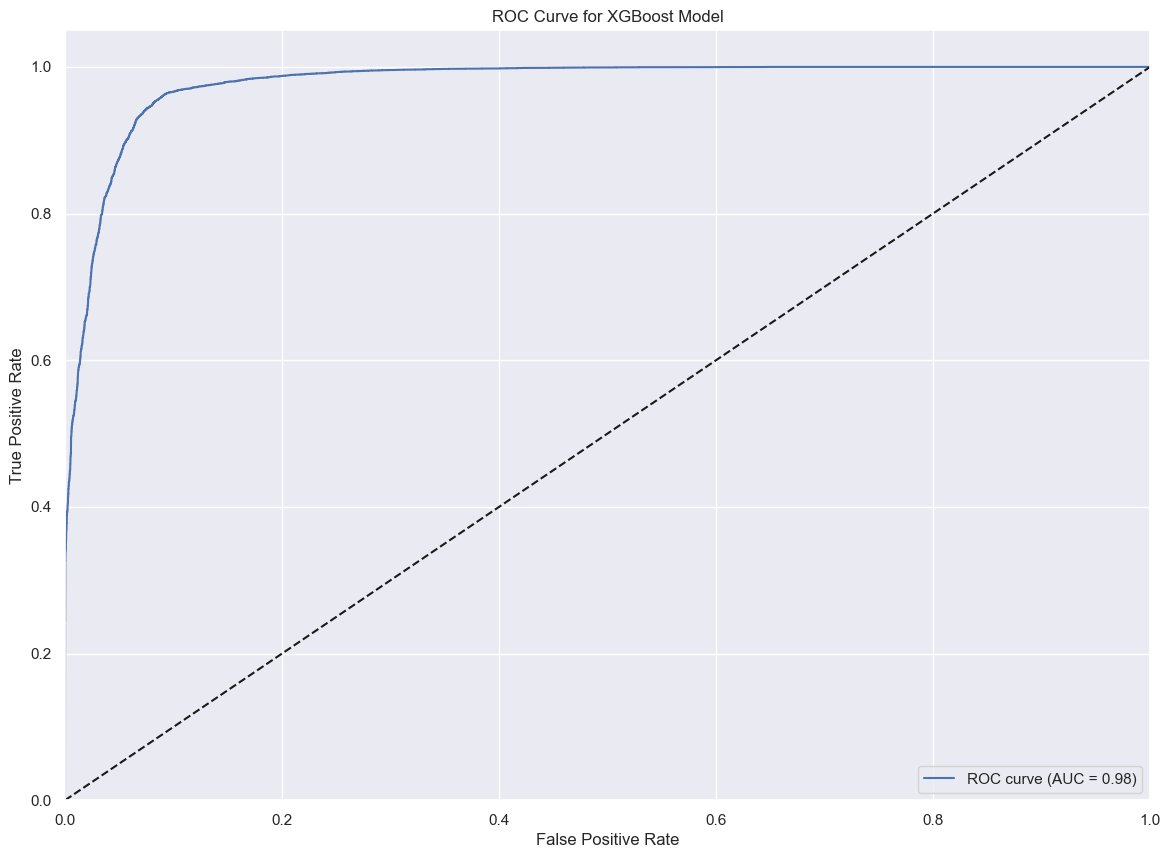

In [75]:
### PLoting ROC Curve and Getting the AUC of the model 


from sklearn.metrics import roc_curve, auc

# training the XGBoost model
model = xgb.train(para, dtrain, num_rounds)

# predicting the target variable on the testing set
y_pred_prob = model.predict(dtest)

# calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_prob)

# calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # plot the random guess curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc="lower right")
sns.set(rc={"figure.figsize":(8, 6)})
plt.show()

* The Model Can Differentiate between Values Very Well Since it has AUC of 0.98 

In [76]:
print("The Classification report for the XGBoost Model on the Standard Scaled Dataset is")
print()
print(classification_report(y_valid,y_pred_binary_ss))

The Classification report for the XGBoost Model on the Standard Scaled Dataset is

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     10029
           1       0.92      0.96      0.94     10027

    accuracy                           0.93     20056
   macro avg       0.94      0.93      0.93     20056
weighted avg       0.94      0.93      0.93     20056



The Confusion Matrix for the XGBoost Model on the Standard Scaled Dataset is

[[9156  873]
 [ 431 9596]]


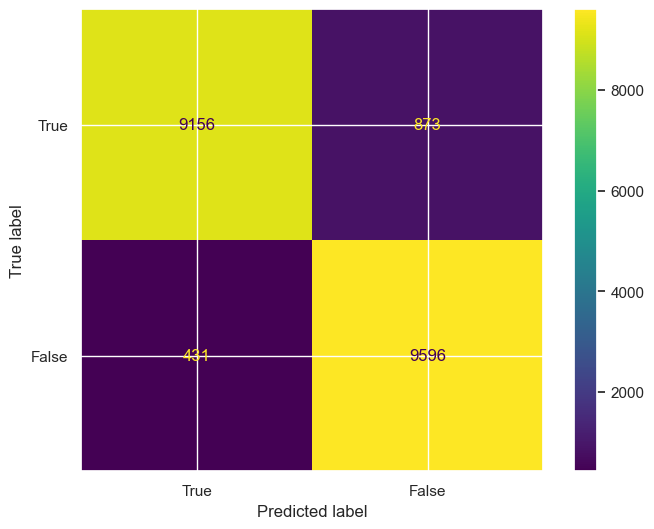

In [77]:
sns.set(rc={"figure.figsize":(8, 6)}) ## Reseting the Plot Size for Confusion Matrix


print("The Confusion Matrix for the XGBoost Model on the Standard Scaled Dataset is")
print()
cf_matrix = confusion_matrix(y_valid,y_pred_binary_ss)
print(cf_matrix)
cm_display =ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [True,False])

cm_display.plot()
plt.show()

1. The value of True Negative of the Matrix is 9156.
2. The value of False Positive of the Matrix is 873.
3. The Value of False Negative of the Matrix is 431.
4. The value of True Positive of the Matrix is 9596.

* The Accuracy = TN+TP/Total = 0.9350 ~ 93.50%

#### 2. CatBoost Model

In [78]:
import catboost as cat
from catboost import CatBoostClassifier

# preparing the data for CatBoost

train_pool = cat.Pool(x_train_ss, y_train)
test_pool = cat.Pool(x_test_ss, y_valid)

# defining the CatBoost model parameters
para = {'iterations': 100, 'learning_rate': 1, 'depth': 10, 'loss_function': 'Logloss', 'eval_metric': 'Accuracy'}
model = CatBoostClassifier(**para)

# training the CatBoost model
model.fit(train_pool)

# predicting the target variable on the testing set
y_pred = model.predict(test_pool)

# evaluating the accuracy of the CatBoost model
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

0:	learn: 0.7867471	total: 134ms	remaining: 13.3s
1:	learn: 0.8040736	total: 149ms	remaining: 7.29s
2:	learn: 0.8181841	total: 165ms	remaining: 5.32s
3:	learn: 0.8252767	total: 178ms	remaining: 4.28s
4:	learn: 0.8330425	total: 193ms	remaining: 3.68s
5:	learn: 0.8358845	total: 207ms	remaining: 3.25s
6:	learn: 0.8378041	total: 223ms	remaining: 2.96s
7:	learn: 0.8400728	total: 247ms	remaining: 2.84s
8:	learn: 0.8428276	total: 273ms	remaining: 2.76s
9:	learn: 0.8456572	total: 305ms	remaining: 2.74s
10:	learn: 0.8482250	total: 330ms	remaining: 2.67s
11:	learn: 0.8494465	total: 352ms	remaining: 2.58s
12:	learn: 0.8506307	total: 375ms	remaining: 2.51s
13:	learn: 0.8530614	total: 395ms	remaining: 2.42s
14:	learn: 0.8536722	total: 419ms	remaining: 2.37s
15:	learn: 0.8548689	total: 448ms	remaining: 2.35s
16:	learn: 0.8578605	total: 477ms	remaining: 2.33s
17:	learn: 0.8626222	total: 510ms	remaining: 2.32s
18:	learn: 0.8632579	total: 531ms	remaining: 2.27s
19:	learn: 0.8643423	total: 557ms	remaini

0:	learn: 0.7867471	total: 21.2ms	remaining: 2.1s
1:	learn: 0.8040736	total: 45.8ms	remaining: 2.24s
2:	learn: 0.8181841	total: 68.1ms	remaining: 2.2s
3:	learn: 0.8252767	total: 93.5ms	remaining: 2.24s
4:	learn: 0.8330425	total: 118ms	remaining: 2.24s
5:	learn: 0.8358845	total: 138ms	remaining: 2.17s
6:	learn: 0.8378041	total: 159ms	remaining: 2.11s
7:	learn: 0.8400728	total: 182ms	remaining: 2.09s
8:	learn: 0.8428276	total: 207ms	remaining: 2.09s
9:	learn: 0.8456572	total: 243ms	remaining: 2.19s
10:	learn: 0.8482250	total: 267ms	remaining: 2.16s
11:	learn: 0.8494465	total: 295ms	remaining: 2.16s
12:	learn: 0.8506307	total: 320ms	remaining: 2.14s
13:	learn: 0.8530614	total: 344ms	remaining: 2.11s
14:	learn: 0.8536722	total: 365ms	remaining: 2.07s
15:	learn: 0.8548689	total: 392ms	remaining: 2.06s
16:	learn: 0.8578605	total: 411ms	remaining: 2.01s
17:	learn: 0.8626222	total: 431ms	remaining: 1.96s
18:	learn: 0.8632579	total: 447ms	remaining: 1.91s
19:	learn: 0.8643423	total: 468ms	remai

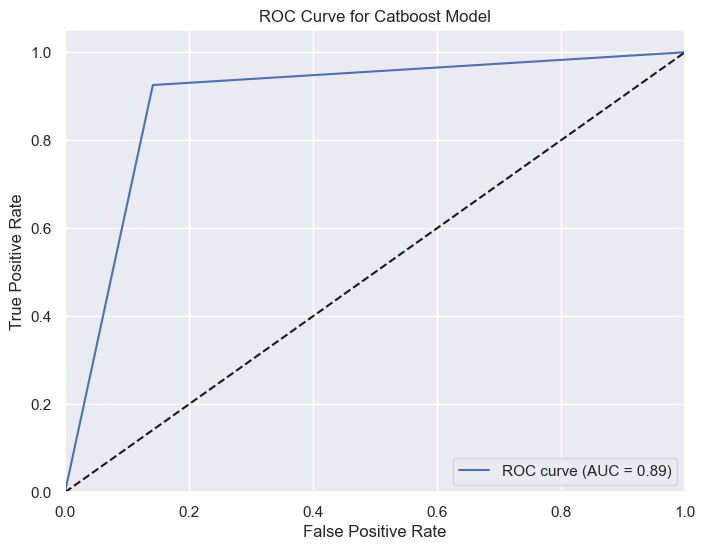

In [79]:
### PLoting ROC Curve and Getting the AUC of the model 


# training the CatBoost model
model.fit(train_pool)

# predicting the target variable on the testing set
y_pred_prob = model.predict(test_pool)

# calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_prob)

# calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # plot the random guess curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Catboost Model')
plt.legend(loc="lower right")
sns.set(rc={"figure.figsize":(8, 6)})
plt.show()

* The Model can Differntiate between values decently since we got the AUC as 0.89

In [80]:
print("The Classification report for the CatBoost Model on the Standard Scaled Dataset is")
print()
print(classification_report(y_valid,y_pred))

The Classification report for the CatBoost Model on the Standard Scaled Dataset is

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     10029
           1       0.87      0.93      0.90     10027

    accuracy                           0.89     20056
   macro avg       0.89      0.89      0.89     20056
weighted avg       0.89      0.89      0.89     20056



The Confusion Matrix for the CatBoost Model on the Standard Scaled Dataset is


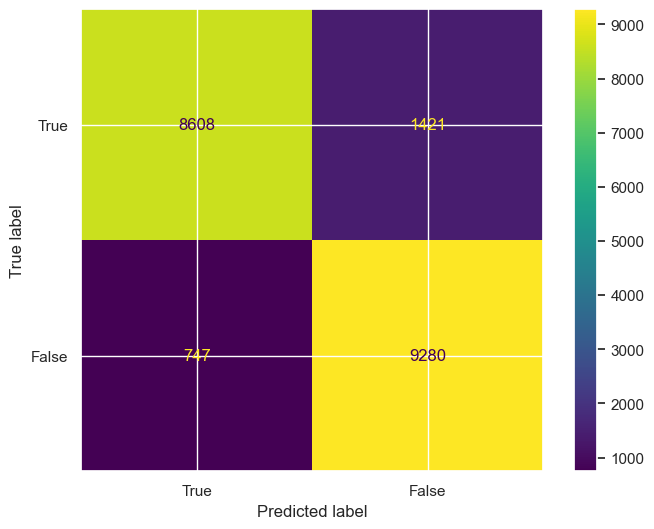

In [81]:
print("The Confusion Matrix for the CatBoost Model on the Standard Scaled Dataset is")

cf_matrix = confusion_matrix(y_valid,y_pred)

cm_display =ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [True,False])

cm_display.plot()
plt.show()

1. The value of True Negative of the Matrix is 8608.
2. The value of False Positive of the Matrix is 1421.
3. The Value of False Negative of the Matrix is 747.
4. The value of True Positive of the Matrix is 9280.

* The Accuracy = TN+TP/Total = 0.8919 ~ 89.19%

#### 3. LightGBM

In [82]:
import lightgbm as lgb

# preparing  the data for LightGBM
train_data = lgb.Dataset(x_train_ss, label=y_train)
test_data = lgb.Dataset(x_test_ss, label=y_valid)

# defining the LightGBM model parameters

para = {'objective': 'binary', 'metric': 'binary_logloss', 'num_leaves': 31, 'learning_rate': 1}

# train the LightGBM model
num_rounds = 100
model = lgb.train(para, train_data, num_rounds)

# predicting the target variable on the testing set
y_pred = model.predict(x_test_ss)

# converting the probabilities to binary predictions
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# evaluating the accuracy of the LightGBM model
accuracy = accuracy_score(y_valid, y_pred_binary)
print('Accuracy: %.2f%%' % (accuracy * 100.0))


[LightGBM] [Info] Number of positive: 40113, number of negative: 40111
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 80224, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500012 -> initscore=0.000050
[LightGBM] [Info] Start training from score 0.000050
Accuracy: 86.68%


[LightGBM] [Info] Number of positive: 40113, number of negative: 40111
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 80224, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500012 -> initscore=0.000050
[LightGBM] [Info] Start training from score 0.000050


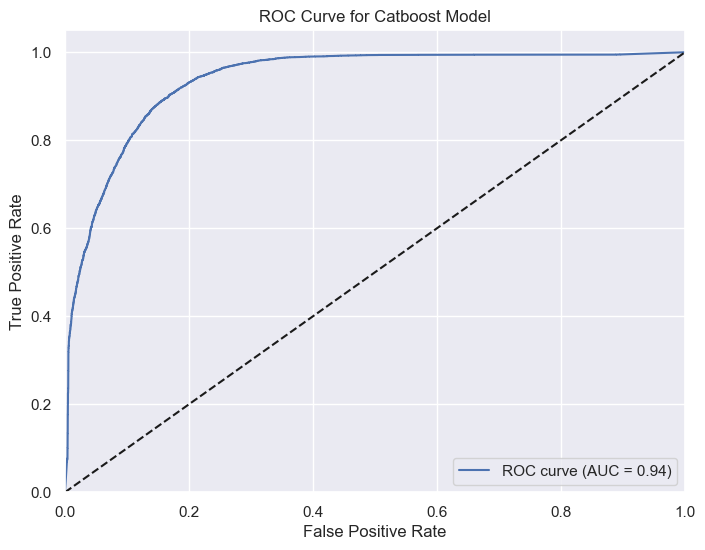

In [83]:
### PLoting ROC Curve and Getting the AUC of the model 


model = lgb.train(para, train_data, num_rounds)

# predicting the target variable on the testing set
y_pred_prob = model.predict(x_test_ss)

# calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_prob)

# calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # plot the random guess curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Catboost Model')
plt.legend(loc="lower right")
sns.set(rc={"figure.figsize":(8, 6)})
plt.show()

* This Model can too Differntiate between values very well since it has got its AUC as 0.94

In [84]:
print("The Classification report for the LightGBM Model on the Standard Scaled Dataset is")
print()
print(classification_report(y_valid,y_pred_binary))

The Classification report for the LightGBM Model on the Standard Scaled Dataset is

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     10029
           1       0.84      0.91      0.87     10027

    accuracy                           0.87     20056
   macro avg       0.87      0.87      0.87     20056
weighted avg       0.87      0.87      0.87     20056



The Confusion Matrix for the LightGBM Model on the Standard Scaled Dataset is



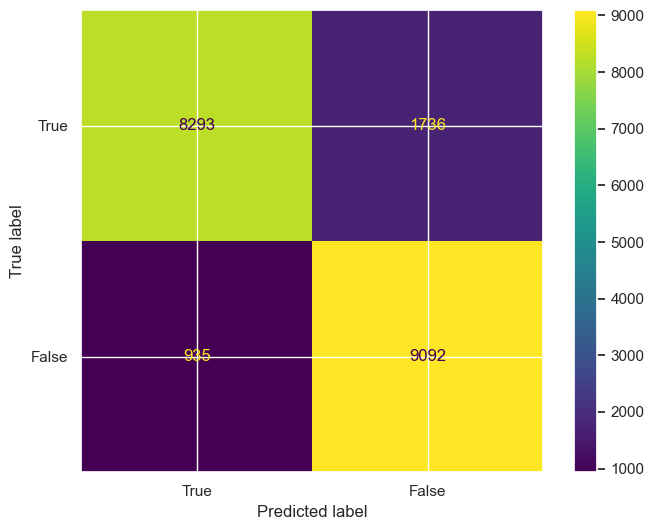

In [85]:
print("The Confusion Matrix for the LightGBM Model on the Standard Scaled Dataset is")
print()

cf_matrix = confusion_matrix(y_valid,y_pred_binary)

cm_display =ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [True,False])

cm_display.plot()
sns.set(rc={"figure.figsize":(8, 6)})
plt.show()

1. The value of True Negative of the Matrix is 8293.
2. The value of False Positive of the Matrix is 1736.
3. The Value of False Negative of the Matrix is 935.
4. The value of True Positive of the Matrix is 9092.

* The Accuracy = TN+TP/Total = 0.8668 ~ 86.68%

# Final Observation
----
 * The XGBoost Model has performed the best out of all three Models, the resons for the following are :- 
   1. It has the Accuracy of almost 94% ~ 93.50%
   2. It has the highest and almost equal number of recall values.
   3. It can predict if a employee should be promoted or not with highest accuracy which other models fails to do.
   4. After Plotting the ROC Curve it has got the highest AUC i.e. 98% which means the model can differentiate between values very well.

                                         ***THE END***